# Style Net using VGG network

In [1]:
import tensorflow as tf
from libs import utils
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
from libs import gif, nb_utils
%matplotlib inline

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from libs import vgg16

In [3]:
net = vgg16.get_vgg_model()

In [4]:
g = tf.Graph()
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    tf.import_graph_def(net['graph_def'], name='vgg')
    names = [op.name for op in g.get_operations()]

In [5]:
nb_utils.show_graph(net['graph_def'])

In [6]:
print(names)

['vgg/images', 'vgg/mul/y', 'vgg/mul', 'vgg/split/split_dim', 'vgg/split', 'vgg/sub/y', 'vgg/sub', 'vgg/sub_1/y', 'vgg/sub_1', 'vgg/sub_2/y', 'vgg/sub_2', 'vgg/concat/concat_dim', 'vgg/concat', 'vgg/conv1_1/filter', 'vgg/conv1_1/Conv2D', 'vgg/conv1_1/biases', 'vgg/conv1_1/BiasAdd', 'vgg/conv1_1/conv1_1', 'vgg/conv1_2/filter', 'vgg/conv1_2/Conv2D', 'vgg/conv1_2/biases', 'vgg/conv1_2/BiasAdd', 'vgg/conv1_2/conv1_2', 'vgg/pool1', 'vgg/conv2_1/filter', 'vgg/conv2_1/Conv2D', 'vgg/conv2_1/biases', 'vgg/conv2_1/BiasAdd', 'vgg/conv2_1/conv2_1', 'vgg/conv2_2/filter', 'vgg/conv2_2/Conv2D', 'vgg/conv2_2/biases', 'vgg/conv2_2/BiasAdd', 'vgg/conv2_2/conv2_2', 'vgg/pool2', 'vgg/conv3_1/filter', 'vgg/conv3_1/Conv2D', 'vgg/conv3_1/biases', 'vgg/conv3_1/BiasAdd', 'vgg/conv3_1/conv3_1', 'vgg/conv3_2/filter', 'vgg/conv3_2/Conv2D', 'vgg/conv3_2/biases', 'vgg/conv3_2/BiasAdd', 'vgg/conv3_2/conv3_2', 'vgg/conv3_3/filter', 'vgg/conv3_3/Conv2D', 'vgg/conv3_3/biases', 'vgg/conv3_3/BiasAdd', 'vgg/conv3_3/conv3_

In [7]:
x = g.get_tensor_by_name(names[0] + ':0')
softmax = g.get_tensor_by_name(names[-2] + ':0')

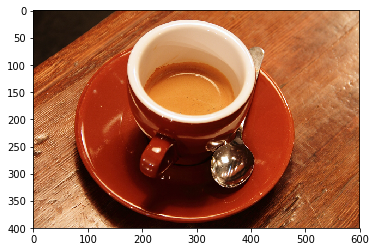

In [8]:
from skimage.data import coffee
og = coffee()
plt.imshow(og)

In [9]:
img = vgg16.preprocess(og)

c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


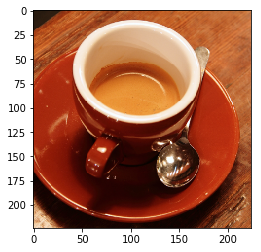

In [10]:
plt.imshow(vgg16.deprocess(img))

In [11]:
img_4d = img[np.newaxis]

with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    res = softmax.eval(feed_dict={x: img_4d})[0]
    print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.94776124, (967, 'n07920052 espresso')), (0.029610293, (968, 'n07930864 cup')), (0.011490672, (868, 'n04476259 tray')), (0.0031900166, (960, 'n07836838 chocolate sauce, chocolate syrup')), (0.0030807205, (925, 'n07584110 consomme'))]


### Dropout

In [12]:
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    res = softmax.eval(feed_dict={x: img_4d})[0]
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])  

[(0.9358504, (967, 'n07920052 espresso')), (0.052885257, (968, 'n07930864 cup')), (0.0036098692, (925, 'n07584110 consomme')), (0.0027980404, (960, 'n07836838 chocolate sauce, chocolate syrup')), (0.0018574891, (868, 'n04476259 tray'))]


In [13]:
[name_i for name_i in names if 'dropout' in name_i]

['vgg/dropout/Shape',
 'vgg/dropout/random_uniform/min',
 'vgg/dropout/random_uniform/range',
 'vgg/dropout/random_uniform/RandomUniform',
 'vgg/dropout/random_uniform/mul',
 'vgg/dropout/random_uniform',
 'vgg/dropout/add/x',
 'vgg/dropout/add',
 'vgg/dropout/Floor',
 'vgg/dropout/mul/y',
 'vgg/dropout/mul',
 'vgg/dropout/mul_1',
 'vgg/dropout_1/Shape',
 'vgg/dropout_1/random_uniform/min',
 'vgg/dropout_1/random_uniform/range',
 'vgg/dropout_1/random_uniform/RandomUniform',
 'vgg/dropout_1/random_uniform/mul',
 'vgg/dropout_1/random_uniform',
 'vgg/dropout_1/add/x',
 'vgg/dropout_1/add',
 'vgg/dropout_1/Floor',
 'vgg/dropout_1/mul/y',
 'vgg/dropout_1/mul',
 'vgg/dropout_1/mul_1']

In [14]:
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    res = softmax.eval(feed_dict={
        x: img_4d,
        'vgg/dropout_1/random_uniform:0': [[1.0] * 4096],
        'vgg/dropout/random_uniform:0': [[1.0] * 4096]})[0]
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.9999962, (967, 'n07920052 espresso')), (3.8689177e-06, (968, 'n07930864 cup')), (5.415354e-10, (504, 'n03063599 coffee mug')), (3.8139292e-10, (960, 'n07836838 chocolate sauce, chocolate syrup')), (3.2201028e-10, (925, 'n07584110 consomme'))]


In [15]:
#running again
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    res = softmax.eval(feed_dict={
        x: img_4d,
        'vgg/dropout_1/random_uniform:0': [[1.0] * 4096],
        'vgg/dropout/random_uniform:0': [[1.0] * 4096]})[0]
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.9999962, (967, 'n07920052 espresso')), (3.8689177e-06, (968, 'n07930864 cup')), (5.415354e-10, (504, 'n03063599 coffee mug')), (3.8139292e-10, (960, 'n07836838 chocolate sauce, chocolate syrup')), (3.2201028e-10, (925, 'n07584110 consomme'))]


### Defining the Content Features

In [17]:
with tf.Session(graph=g) as sess, g.device('/cpu:0'):
    content_layer = 'vgg/conv4_2/conv4_2:0'
    content_features = g.get_tensor_by_name(content_layer).eval(
        session = sess,
        feed_dict={x: img_4d,
                  'vgg/dropout_1/random_uniform:0': [[1.0] * 4096],
                'vgg/dropout/random_uniform:0': [[1.0] * 4096]
                  })
print(content_features.shape)

(1, 28, 28, 512)


### Defining the Style Features

In [18]:
filepath = utils.download('https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/El_jard%C3%ADn_de_las_Delicias%2C_de_El_Bosco.jpg/640px-El_jard%C3%ADn_de_las_Delicias%2C_de_El_Bosco.jpg')

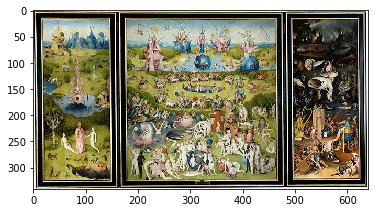

In [20]:
style_og = plt.imread(filepath)
plt.imshow(style_og)

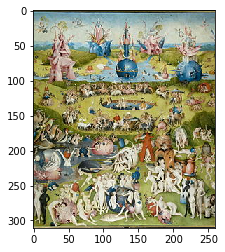

In [21]:
#cropping borders out
style_og = plt.imread(filepath)[15:-15,190:-190:,]
plt.imshow(style_og)

In [22]:
style_img = vgg16.preprocess(style_og)
style_img_4d = style_img[np.newaxis]

c:\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
